In [1]:
## Standard Statsmodels import
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.facecolor'] = 'white'
plt.style.use(['seaborn-talk'])
# pd.set_option('display.max_columns',25)

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df['symboling'] = df['symboling'].astype('str')

In [5]:
## saving list of numeric features to slice for pairplot
num_selector = make_column_selector(dtype_include='number')
cols = num_selector(df.drop(columns='price'))
len(cols)

14

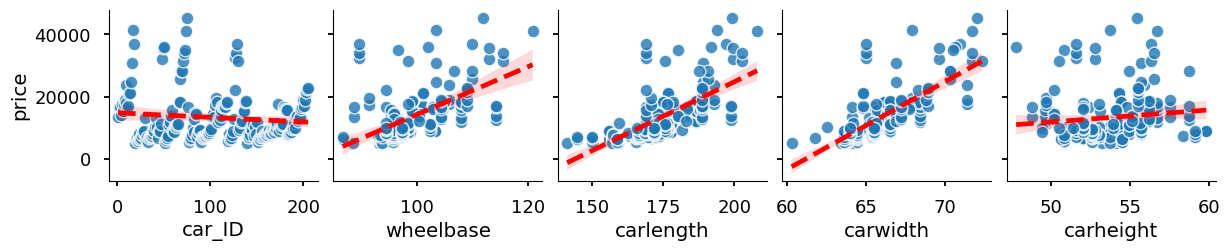

In [7]:
## Making a pairplot with regression lines (Next 5 features)
sns.pairplot(df, y_vars='price',kind='reg',x_vars=cols[:5],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));


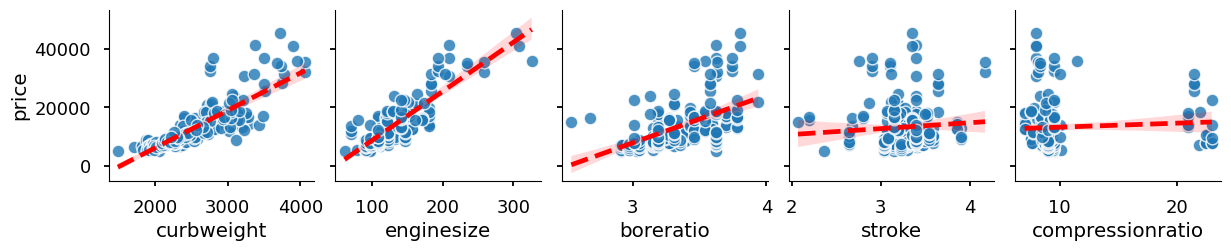

In [8]:
## Making a pairplot with regression lines (Next 5 features)
sns.pairplot(df, y_vars='price',kind='reg',x_vars=cols[5:10],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

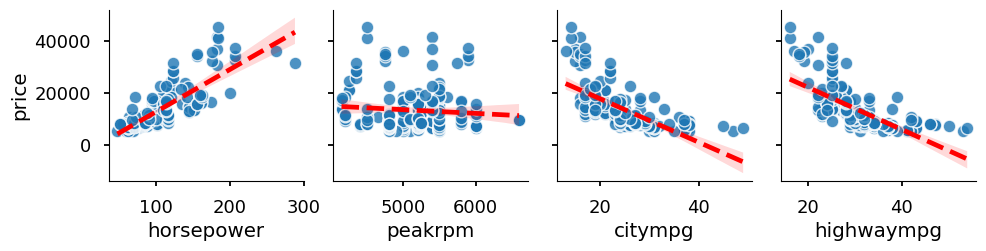

In [9]:
## Making a pairplot with regression lines (Next 5 features)
sns.pairplot(df, y_vars='price',kind='reg',x_vars=cols[10:],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

In [10]:
df = df.drop(columns=['peakrpm', 'stroke', 'carheight', 'car_ID'])
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,compressionratio,horsepower,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,dohc,four,130,mpfi,3.47,9.0,111,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,dohc,four,130,mpfi,3.47,9.0,111,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,ohcv,six,152,mpfi,2.68,9.0,154,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,ohc,four,109,mpfi,3.19,10.0,102,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,ohc,five,136,mpfi,3.19,8.0,115,18,22,17450.0


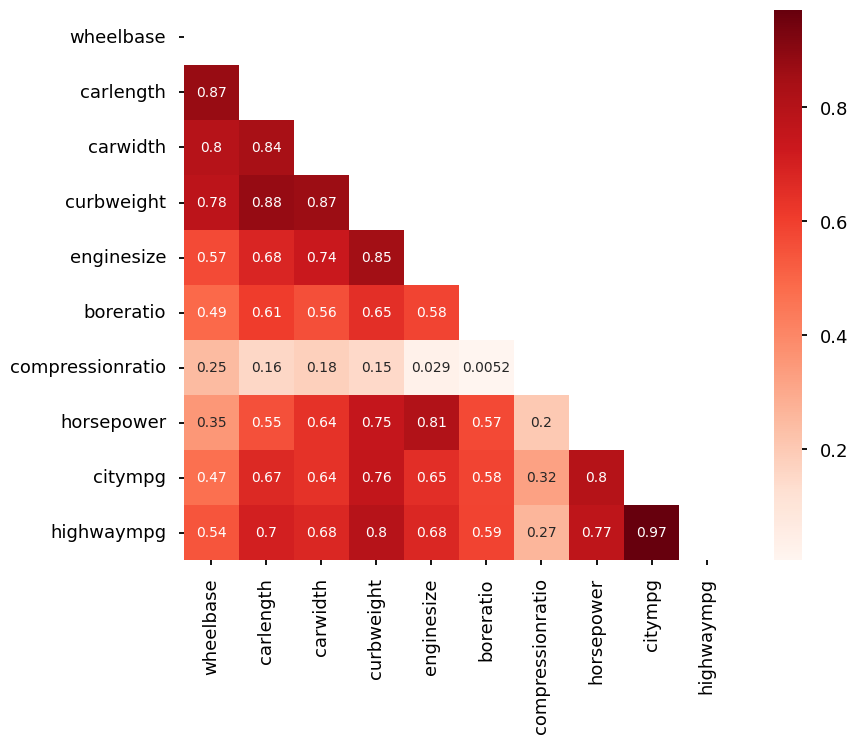

In [11]:
## Calculating the mask to hide the upper-right of the triangle
corr = df.drop(columns='price').corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

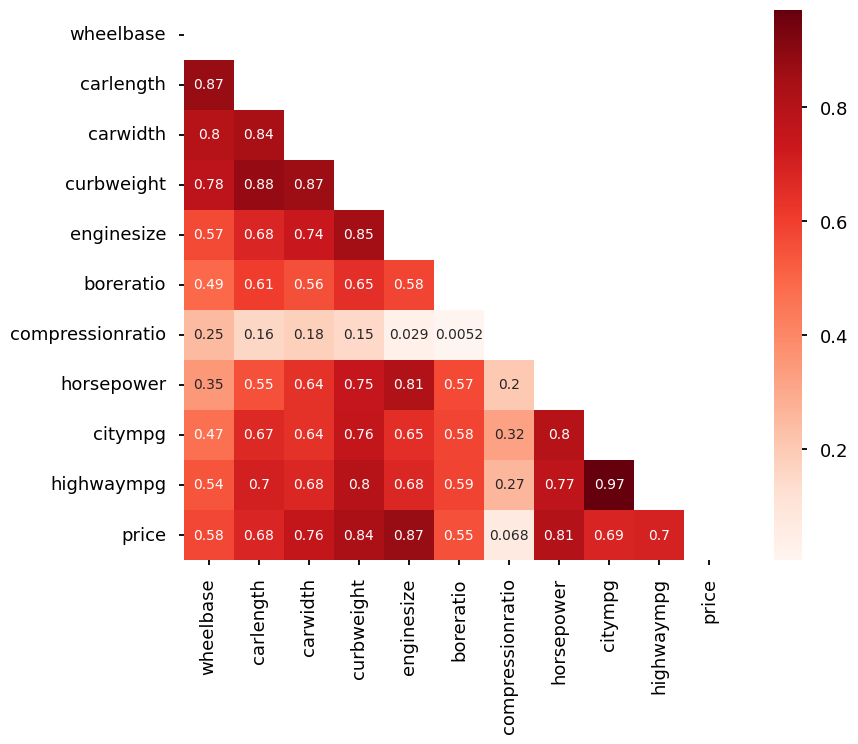

In [12]:
## Adding price back to the correlation heatmap
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);



In [14]:
df = df.drop(columns=['wheelbase','carlength', 'curbweight'])
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,compressionratio,horsepower,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,64.1,dohc,four,130,mpfi,3.47,9.0,111,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,64.1,dohc,four,130,mpfi,3.47,9.0,111,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,65.5,ohcv,six,152,mpfi,2.68,9.0,154,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,66.2,ohc,four,109,mpfi,3.19,10.0,102,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,66.4,ohc,five,136,mpfi,3.19,8.0,115,18,22,17450.0


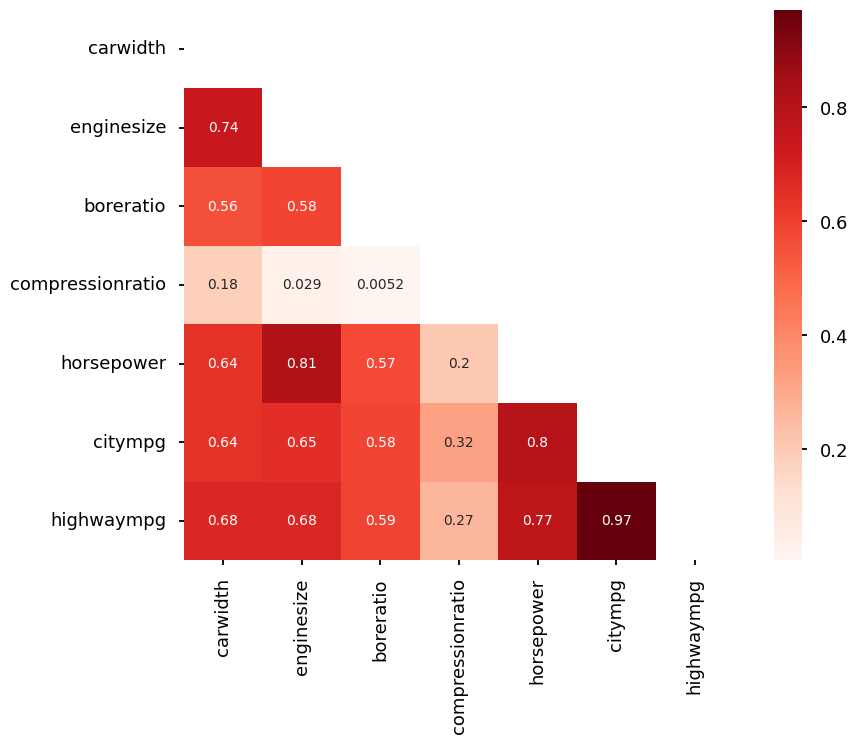

In [15]:
## Calculating the mask to hide the upper-right of the triangle
corr = df.drop(columns='price').corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);



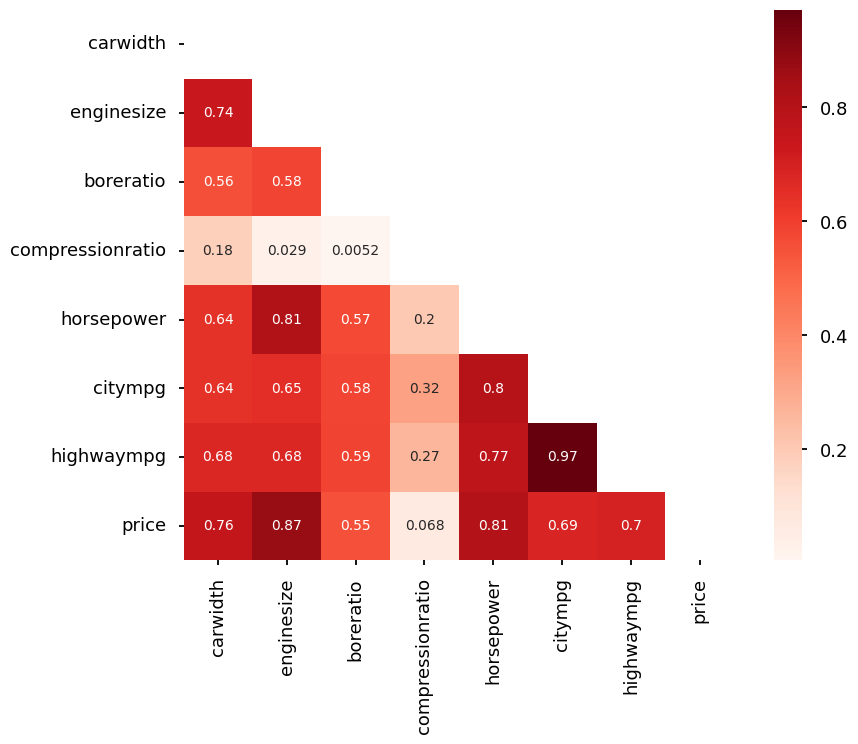

In [16]:
## Adding price back to the correlation heatmap
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);


In [18]:
df = df.drop(columns=['horsepower','citympg'])
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,compressionratio,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,64.1,dohc,four,130,mpfi,3.47,9.0,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,64.1,dohc,four,130,mpfi,3.47,9.0,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,65.5,ohcv,six,152,mpfi,2.68,9.0,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,66.2,ohc,four,109,mpfi,3.19,10.0,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,66.4,ohc,five,136,mpfi,3.19,8.0,22,17450.0


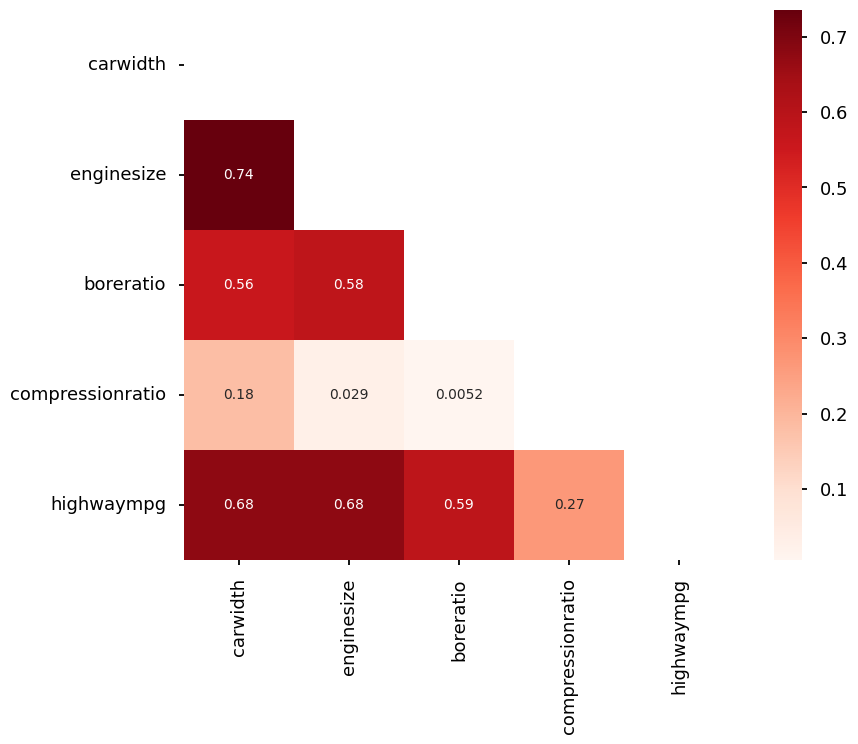

In [19]:
## Calculating the mask to hide the upper-right of the triangle
corr = df.drop(columns='price').corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);



In [20]:
## Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price']).copy()
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,compressionratio,highwaympg
17,0,bmw x3,gas,std,four,sedan,rwd,front,70.9,ohc,six,209,mpfi,3.62,8.0,20
39,0,honda prelude,gas,std,four,sedan,fwd,front,65.2,ohc,four,110,1bbl,3.15,9.0,33
40,0,honda accord,gas,std,four,sedan,fwd,front,62.5,ohc,four,110,1bbl,3.15,9.0,33
47,0,jaguar xj,gas,std,four,sedan,rwd,front,69.6,dohc,six,258,mpfi,3.63,8.1,19
123,-1,plymouth valiant,gas,std,four,wagon,fwd,front,64.6,ohc,four,122,2bbl,3.35,8.5,30


In [21]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols


['symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [22]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False)
                        )
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
preprocessor = make_column_transformer( (num_pipe, num_cols),
                                       (cat_pipe,cat_cols),
                                       remainder='passthrough')
preprocessor


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['carwidth', 'enginesize', 'boreratio',
                                  'compressionratio', 'highwaympg']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['symboling', 'CarName', 'fueltype',
                                  'aspiration', 'doornumber', 'carbody',
                                  'drivewheel', 'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem'])])

In [23]:
## fit the col transformer to learn feature names 
preprocessor.fit(X_train)
## Now create list of our final features after preprocessing
final_features = []
## adding the numeric features which process first in the Col Trans
final_features.extend(num_cols)
## Now, get OHe feature names
cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)
final_features.extend(cat_features)
## Transform X vars and remake as dataframes
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                         columns=final_features, 
                         index=X_train.index)
X_test_df = pd.DataFrame( preprocessor.transform(X_test), 
                         columns=final_features, 
                         index=X_test.index)
X_test_df.head()

,carwidth,enginesize,boreratio,compressionratio,highwaympg,symboling_-1,symboling_-2,symboling_0,symboling_1,symboling_2,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
48,69.6,258.0,3.63,8.1,19.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
196,67.2,141.0,3.78,9.5,28.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
148,65.4,108.0,3.62,9.0,29.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53,64.2,91.0,3.03,9.0,38.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99,65.2,120.0,3.33,8.5,34.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
## Adding constants for statsmodels
X_train_df = sm.add_constant(X_train_df, prepend=False)
X_test_df = sm.add_constant(X_test_df, prepend=False)
X_train_df.head(2)


,carwidth,enginesize,boreratio,compressionratio,highwaympg,symboling_-1,symboling_-2,symboling_0,symboling_1,symboling_2,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
17,70.9,209.0,3.62,8.0,20.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39,65.2,110.0,3.15,9.0,33.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
## make & fit a statmsodels OLS
model = sm.OLS(y_train,X_train_df)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     25.86
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           2.15e-07
Time:                        13:00:11   Log-Likelihood:                -1148.7
No. Observations:                 153   AIC:                             2579.
Df Residuals:                      12   BIC:                             3007.
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [26]:
# To get our residuals from statsmodels and preview first 5
resid = result.resid
resid.head()



17     1.809366e+03
39    -5.420588e-10
40     1.761368e+03
47     3.310561e-10
123    2.673914e-10
dtype: float64

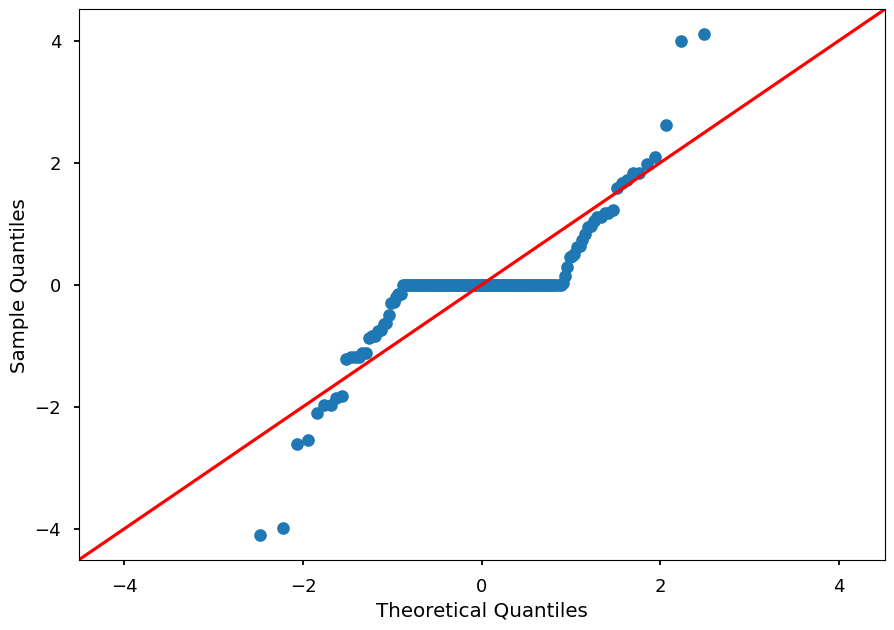

In [27]:
sm.graphics.qqplot(resid,line='45',fit=True);



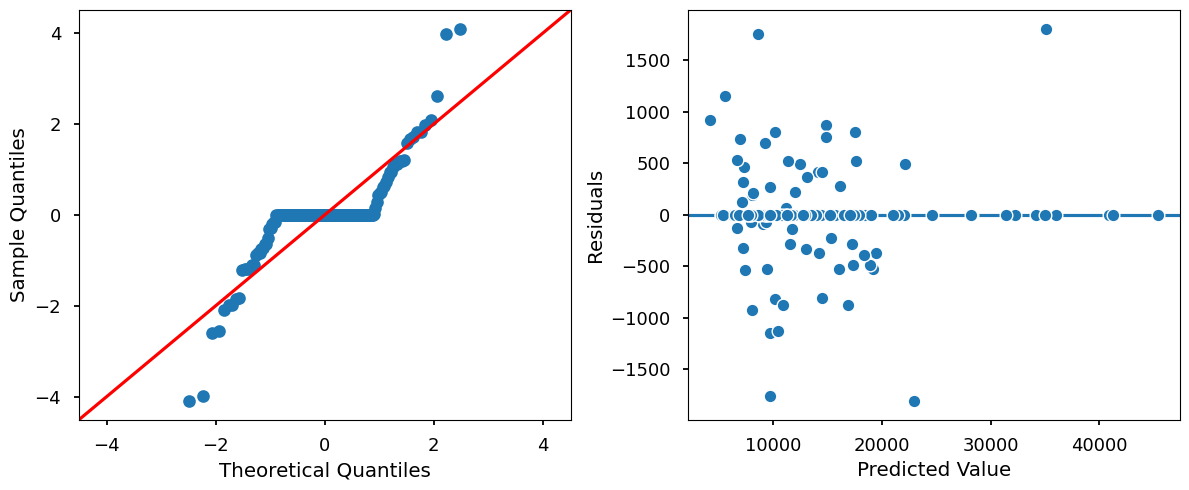

In [28]:
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    
evaluate_ols(result,X_train_df, y_train)

In [33]:
scaler = StandardScaler()
z_price = scaler.fit_transform(y_train.values.reshape(-1,1))
z_price

z_price = pd.Series(z_price.flatten(),index=y_train.index )
z_price

17     3.105910
39    -0.547473
40    -0.358516
47     2.502552
123   -0.537569
         ...   
200    0.495048
41    -0.013181
31    -0.806800
124   -0.036768
26    -0.708542
Length: 153, dtype: float64

In [34]:
## saving the true/false result as our outlier index
idx_outliers= z_price>3
idx_outliers


17      True
39     False
40     False
47     False
123    False
       ...  
200    False
41     False
31     False
124    False
26     False
Length: 153, dtype: bool

In [35]:
## How many outliers did we find?
idx_outliers.sum()


4

In [36]:
## saving a cleaned version of y_train and X_train with outliers removed
y_train_cln = y_train[~idx_outliers]
X_train_cln = X_train_df[~idx_outliers]


In [37]:
print(f"Our model includes cars priced:")
print(f"- Greater than ${y_train_cln.min():,.2f}")
print(f"- Less than ${y_train_cln.max():,.2f}")

Our model includes cars priced:
- Greater than $5,118.00
- Less than $36,000.00


In [38]:
# Getting scaled y_test
z_price_test = scaler.transform(y_test.values.reshape(-1,1))
z_price_test = pd.Series(z_price_test.flatten(),index=y_test.index )
# saving the true/false result as our outlier index
idx_outliers_test= z_price_test>3
# how many outleirs in test data?
idx_outliers_test.sum()


1

In [39]:
## make clean version of X_test and y_test
X_test_cln = X_test_df[~idx_outliers_test] 
y_test_cln = y_test[~idx_outliers_test]


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     62.00
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           6.25e-09
Time:                        13:06:40   Log-Likelihood:                -1017.1
No. Observations:                 149   AIC:                             2310.
Df Residuals:                      11   BIC:                             2725.
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

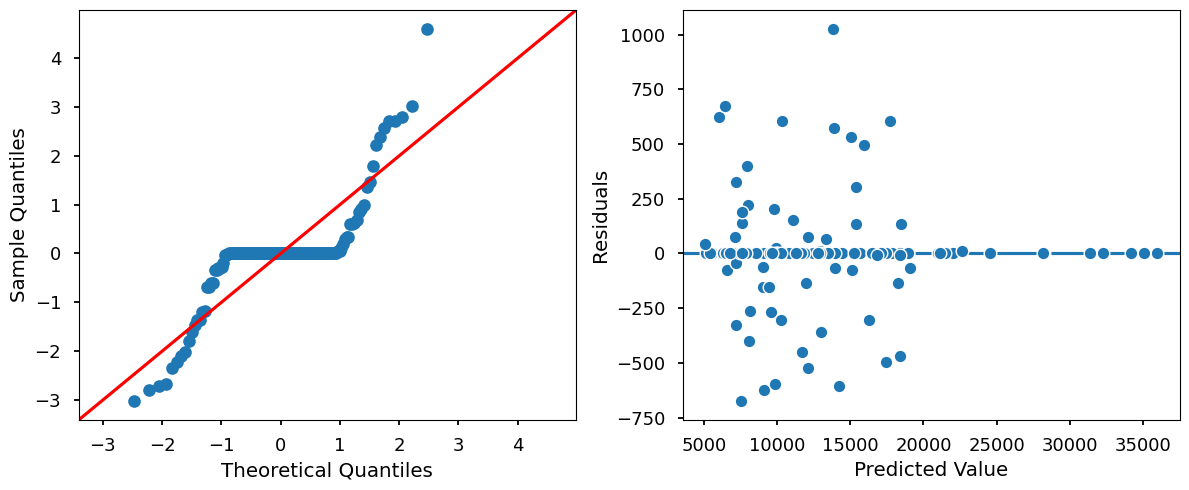

In [40]:
## make & fit a statmsodels OLS
model = sm.OLS(y_train_cln,X_train_cln)
result = model.fit()
print(result.summary())
evaluate_ols(result,X_train_cln,y_train_cln)

In [41]:
## save p-values
p_vals = result.pvalues
## filter for p_values that are >.05
p_vals[p_vals>.05]


carwidth            0.551493
compressionratio    0.862684
highwaympg          0.519406
symboling_-1        0.192882
symboling_-2        0.060553
                      ...   
fuelsystem_idi      0.429722
fuelsystem_mfi      0.616009
fuelsystem_mpfi     0.152895
fuelsystem_spdi     0.198857
fuelsystem_spfi     0.782978
Length: 106, dtype: float64